<a href="https://colab.research.google.com/github/2002hk/Machine-Learning-Concepts/blob/main/KNN_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
data=pd.read_csv('/content/Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [19]:
x=data.iloc[:,2:4].values

In [20]:
y=data.iloc[:,-1].values

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [22]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [23]:
x_train=scaler.fit_transform(x_train)
x_train

array([[-1.08854277, -1.59415208],
       [-1.08854277,  0.3305213 ],
       [ 2.12451891, -0.81225352],
       [-0.42703007, -0.54159632],
       [ 2.0300171 ,  1.83417238],
       [ 1.84101347, -0.27093913],
       [ 1.27400258,  2.31534073],
       [-0.23802644, -0.33108517],
       [ 0.99049714,  1.50336915],
       [-0.42703007,  1.32293102],
       [ 1.08499895, -1.23327582],
       [-0.42703007, -1.14305676],
       [-0.23802644,  0.84176267],
       [-0.23802644,  0.24030224],
       [-1.08854277, -1.56407906],
       [ 1.65200984,  1.68380728],
       [-0.23802644,  0.08993713],
       [-0.80503733,  2.37548677],
       [-0.99404096, -0.33108517],
       [ 1.17950077,  0.57110548],
       [-0.33252826, -0.7821805 ],
       [ 1.84101347, -1.08291071],
       [ 1.93551528,  2.25519469],
       [-0.42703007, -0.7821805 ],
       [-0.04902282,  0.02979109],
       [-0.33252826, -1.32349489],
       [-1.08854277, -1.6242251 ],
       [-1.75005547, -1.44378697],
       [-1.56105184,

In [24]:
x_test=scaler.transform(x_test)
x_test

array([[-7.10535516e-01, -1.56407906e+00],
       [-1.08854277e+00, -1.02276467e+00],
       [ 8.01493512e-01,  3.90667346e-01],
       [-1.56105184e+00,  5.71105476e-01],
       [ 8.01493512e-01, -3.01012151e-01],
       [-8.05037330e-01,  1.80156195e-01],
       [ 1.74651165e+00,  1.92439145e+00],
       [ 1.65200984e+00,  1.83417238e+00],
       [-6.16033702e-01, -9.05009994e-02],
       [-7.10535516e-01,  1.41315008e+00],
       [ 1.08499895e+00,  6.01178498e-01],
       [-5.21531887e-01,  2.43563282e+00],
       [-1.75005547e+00,  2.10229217e-01],
       [ 2.34482627e-01, -2.40866108e-01],
       [-1.43524630e-01, -1.08291071e+00],
       [-5.21531887e-01,  1.44322310e+00],
       [ 5.17988069e-01,  1.29285800e+00],
       [-9.94040959e-01, -1.14305676e+00],
       [ 2.34482627e-01,  8.99371303e-02],
       [ 4.23486255e-01,  3.30521303e-01],
       [-4.90228161e-02,  3.00448282e-01],
       [-1.37204822e+00, -1.47385999e+00],
       [-4.27030073e-01, -2.81934578e-04],
       [-1.

In [25]:
np.sqrt(x_train.shape[0])

17.88854381999832

In [26]:
k=17

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=k)

In [28]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [29]:
y_pred=knn.predict(x_test)


In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.85

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[41,  8],
       [ 4, 27]])

In [34]:
#decision boundary for knn
a=np.arange(start=x_train[:,0].min()-1, stop=x_train[:,0].max()+1, step=0.01)
b=np.arange(start=x_train[:,1].min()-1, stop=x_train[:,1].max()+1, step=0.01)


XX,YY=np.meshgrid(a,b)

## classifying every point on meshgrid

In [35]:
input_array=np.array([XX.ravel(),YY.ravel()]).T

labels=knn.predict(input_array)

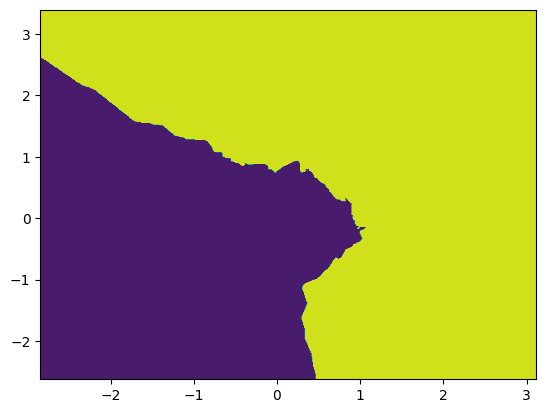

In [36]:
plt.contourf(XX,YY,labels.reshape(XX.shape))

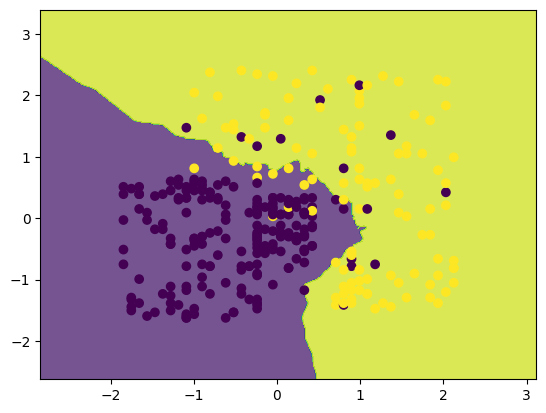

In [38]:
plt.contourf(XX,YY,labels.reshape(XX.shape), alpha=0.75)
plt.scatter(x_train[:,0],x_train[:,1], c=y_train)